ref: https://surprise.readthedocs.io/en/stable/getting_started.html

In [1]:
from surprise import KNNBasic
from surprise import Dataset

# Load the movielens-100k dataset
data = Dataset.load_builtin('ml-100k')

# Retrieve the trainset.
trainset = data.build_full_trainset()

# Build an algorithm, and train it.
algo = KNNBasic()
algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [2]:
uid = str(196)  # raw user id (as in the ratings file). They are **strings**!
iid = str(302)  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items.
pred = algo.predict(uid, iid, r_ui=4, verbose=True)

user: 196        item: 302        r_ui = 4.00   est = 4.06   {'actual_k': 40, 'was_impossible': False}


In [1]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate


# Load the movielens-100k dataset 
data = Dataset.load_builtin('ml-100k')

# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
# RMSE:  root-mean-square error
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9417  0.9284  0.9289  0.9421  0.9337  0.9350  0.0060  
MAE (testset)     0.7426  0.7333  0.7324  0.7427  0.7350  0.7372  0.0046  
Fit time          4.16    3.82    4.16    3.82    4.16    4.02    0.17    
Test time         0.16    0.11    0.15    0.16    0.16    0.15    0.02    


{'test_rmse': array([0.94171919, 0.92838671, 0.92893335, 0.94207011, 0.93367925]),
 'test_mae': array([0.74263006, 0.73331587, 0.73235005, 0.7427354 , 0.73497074]),
 'fit_time': (4.157334804534912,
  3.8232309818267822,
  4.164271116256714,
  3.8168509006500244,
  4.160311937332153),
 'test_time': (0.15915703773498535,
  0.1126861572265625,
  0.1542339324951172,
  0.1556563377380371,
  0.15628480911254883)}

In [6]:
from surprise import KNNBasic
from surprise import Dataset
from surprise.model_selection import cross_validate


# Load the movielens-100k dataset 
data = Dataset.load_builtin('ml-100k')

# We'll use the famous SVD algorithm.
algo = KNNBasic()

# Run 5-fold cross-validation and print results
# RMSE:  root-mean-square error
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9829  0.9763  0.9789  0.9842  0.9747  0.9794  0.0037  
MAE (testset)     0.7755  0.7707  0.7748  0.7756  0.7700  0.7733  0.0025  
Fit time          0.30    0.32    0.30    0.31    0.31    0.31    0.01    
Test time         2.82    2.79    2.99    2.80    2.73    2.83    0.09    


{'test_rmse': array([0.98293537, 0.97631782, 0.97890075, 0.98421874, 0.97471708]),
 'test_mae': array([0.77553231, 0.7707447 , 0.77481232, 0.77561288, 0.76997497]),
 'fit_time': (0.2990987300872803,
  0.317732572555542,
  0.2977406978607178,
  0.3118462562561035,
  0.3140370845794678),
 'test_time': (2.8242127895355225,
  2.7910351753234863,
  2.986762762069702,
  2.796764612197876,
  2.7304117679595947)}

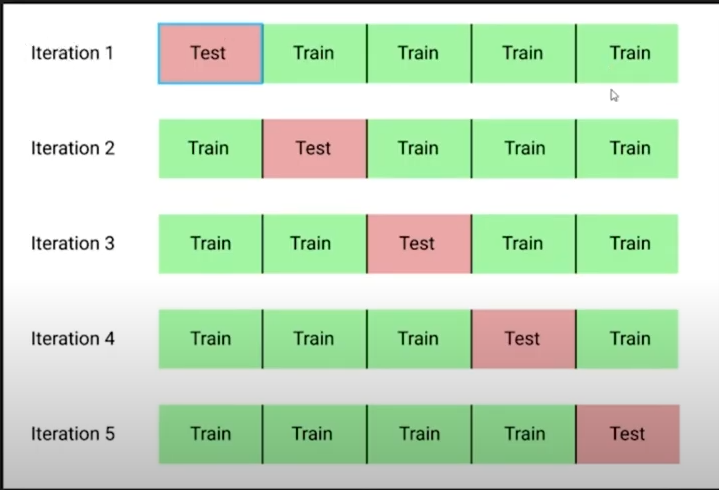

Algorithm | Description
--| --
random_pred.NormalPredictor	|Algorithm predicting a random rating based on the distribution of the training set, which is assumed to be normal.
baseline_only.BaselineOnly	|Algorithm predicting the baseline estimate for given user and item.
knns.KNNBasic	|A basic collaborative filtering algorithm.
knns.KNNWithMeans	|A basic collaborative filtering algorithm, taking into account the mean ratings of each user.
knns.KNNWithZScore	|A basic collaborative filtering algorithm, taking into account the z-score normalization of each user.
knns.KNNBaseline	|A basic collaborative filtering algorithm taking into account a baseline rating.
matrix_factorization.SVD	|The famous SVD algorithm, as popularized by Simon Funk during the Netflix Prize.When baselines are not used, this is equivalent to Probabilistic Matrix Factorization [salakhutdinov2008a] (see note below)..
matrix_factorization.SVDpp	|The SVD++ algorithm, an extension of SVD taking into account implicit ratings.
matrix_factorization.NMF	|A collaborative filtering algorithm based on Non-negative Matrix Factorization.
slope_one.SlopeOne	|A simple yet accurate collaborative filtering algorithm.
co_clustering.CoClustering	|A collaborative filtering algorithm based on co-clustering.

In [2]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

# Load the movielens-100k dataset 
data = Dataset.load_builtin('ml-100k')

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9367


0.9366602819188123